# Rafa Rodriguez - IA_Machine Learning

## Generalidades: 
En este proyecto vamos a trabajar con un conjunto de datos musicales que consta de canciones registradas en Spotify, la plataforma de música online más reconocida por oyentes y artistas; los datos han sido obtenidos de la plataforma de Kaggle: (https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset).

En nuestros datos podemos encontrar hasta 125 géneros musicales diferentes, acompañados de 20 columnas de datos con las características que acompañan al genero y la popularidad que ha alcanzado.

## Objetivo:
El principal objetivo del proyecto es comprobar que datos hacen que una canción alcance más popularidad, teniendo a esta como nuestra variable objetivo. La idea principal de este objetivo es que un artista pueda identificar que características hacen que una canción pueda ser más o menos popular, debido a que entendemos que popularidad = éxito, por lo que realmente estamos comprobando cuanto éxito alcanzara un artista según las características que ofrece en sus canciones.

Dentro del desarrollo del mismo proyecto, resolvemos diferentes objetivos técnicos como puede ser:

- Classificación, ya que clasificamos y categorizamos nuestros datos.
- Correlación, comparamos entre sí las diferentes características, teniendo como eje la popularidad para determinar si la relacion entre ellas es directamente proporcional a la solución de nuestra variable objetivo.
- Conversión de datos, algo necesario para la preparación de los datos de cara a entrenar el modelo.
- Gráficos, establecer criterios visuales que nos permitan entender mejor los datos que tratamos.

## Modelo:
Queremos ver si los modelos seleccionados son capaces de predecir que musica o canciones tienen más probabilidad de tener éxito, según la relacion y prediccion de sus características.

Esto permitirá a artistas direccionar las capacidades creativas para establecer un balance al realizar canciones propias, donde el arte y los conjuntos estadísticos forman parte del equipo necesario para que alcancen un mayor número de oyentes.

### Exploración, visualización y Pre-procesamiento de datos (Análisis de datos)



In [1]:
# Vamos a comenzar con la exploración de nuestro dat set elegido: [Lista de canciones de spotify]
# Primero vamos a hacer una visualización de los datos que tenemos, procesaremos la informacion y
# luego estableceremos un modelo para relacionar esos datos.
# para ello necesitamos las siguientes librerias:

# Para el procesamiento de datos
import os
import pandas as pd
import numpy as np

# Para la visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Para el machine learning:
# - modelos:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
# - visualización de datos del modelo:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [2]:
# Establecemos una ruta hacia el csv que contiene la informacion
ruta_spoty="C:\\Users\\Kocxi\\AnacondaProjects\\Inteligencia artificial\\Proyecto final\\spoty_dataset.csv"
spoty_data=pd.read_csv(ruta_spoty, delimiter=',', index_col=0) 
# [index_col=0] hace referencia a poner la primera columna como nuestro indice, porque aparecia una columna generada 
# automaticamente de nombre unnamed, lo que duplicaba el indice.

# Vamos a mostrar los 10 primeros registros de nuestro dataset.
spoty_data.head(10)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [3]:
# Vamos a mostrar los 10 ultimos registros de nuestro dataset.
spoty_data.tail(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113990,2A4dSiJmbviL56CBupkh6C,Lucas Cervetti,Frecuencias Álmicas en 432hz (Solo Piano),Frecuencia Álmica XI - Solo Piano,22,369049,False,0.579,0.245,4,-16.357,1,0.0384,0.97000,0.924000,0.1010,0.3020,112.011,3,world-music
113991,0CE0Y6GM75cbrqao8EOAlW,Chris Tomlin,The Ultimate Playlist,At The Cross (Love Ran Red),32,250629,False,0.387,0.531,8,-4.788,1,0.0290,0.00305,0.000000,0.2010,0.1530,146.003,4,world-music
113992,3FjOBB4EyIXHYUtSgrIdY9,Jesus Culture,Revelation Songs,Your Love Never Fails,38,312566,False,0.475,0.860,10,-4.722,1,0.0421,0.00650,0.000002,0.2460,0.4270,113.949,4,world-music
113993,4OkMK49i3NApR1KsAIsTf6,Chris Tomlin,See The Morning (Special Edition),How Can I Keep From Singing,39,256026,False,0.505,0.687,10,-4.375,1,0.0287,0.08410,0.000000,0.1880,0.3820,104.083,3,world-music
113994,4WbOUe6T0sozC7z5ZJgiAA,Lucas Cervetti,Frecuencias Álmicas en 432hz,"Frecuencia Álmica, Pt. 4",22,305454,False,0.331,0.171,1,-15.668,1,0.0350,0.92000,0.022900,0.0679,0.3270,132.147,3,world-music
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,5,-16.393,1,0.0422,0.64000,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,0,-18.318,0,0.0401,0.99400,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,0,-10.895,0,0.0420,0.86700,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,7,-10.889,1,0.0297,0.38100,0.000000,0.2700,0.4130,135.960,4,world-music
113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,1,-10.204,0,0.0725,0.68100,0.000000,0.0893,0.7080,79.198,4,world-music


In [4]:
# Comprobamos informacion general del dataset.
spoty_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

#### A continuacion mostramos la información de las columnas, para entenderlas mejor:

 - **track_id:** El ID de Spotify de la canción
 - **artist:** Los nombres de los artistas que interpretaron el tema. Si hay más de un artista, se separan            por un signo ;
 - **album_name:** El nombre del álbum en el que aparece la pista.
 - **track_name:** Nombre de la pista.
 - **popularity:** La popularidad de una canción es un valor entre 0 y 100, siendo 100 la más popular. La                popularidad se calcula mediante un algoritmo y se basa, en su mayor parte, en el número                total de reproducciones que ha tenido la canción y lo recientes que son esas                          reproducciones. En general, las canciones que se reproducen mucho ahora tendrán una                    popularidad más alta que las canciones que se reproducían mucho en el pasado. Las                      canciones duplicadas (por ejemplo, la misma canción de un single y de un álbum) se                    valoran de forma independiente. La popularidad de artistas y álbumes se obtiene                        matemáticamente a partir de la popularidad de las canciones.
 - **duration_ms:** La longitud de la pista en milisegundos
 - **explicit:** Si la canción tiene o no letra explícita (verdadero = sí la tiene; falso = no la tiene O              desconocido)
 - **danceability:** La bailabilidad describe lo adecuada que es una pista para bailar basándose en una                    combinación de elementos musicales como el tempo, la estabilidad del ritmo, la fuerza                  del compás y la regularidad general. Un valor de 0,0 es el menos bailable y 1,0 el                    más bailable.
 - **energy:** La energía es una medida de 0,0 a 1,0 y representa una medida perceptiva de intensidad y              actividad. Normalmente, las pistas energéticas son rápidas y ruidosas. Por                  ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene poca.
 - **key:** La tonalidad de la pista. Los números enteros se asignan a tonos utilizando la notación               estándar Pitch Class. Por ejemplo, 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se             detecta ninguna clave, el valor es -1
 - **loudness:** La sonoridad global de una pista en decibelios (dB)
 - **mode:** El modo indica la modalidad (mayor o menor) de una pista, el tipo de escala del que se deriva          su contenido melódico. Mayor se representa con 1 y menor con 0
 - **speechiness:** La locuacidad detecta la presencia de palabras habladas en una pista. Cuanto más                       exclusivamente hablada sea la grabación (por ejemplo, programa de entrevistas,                         audiolibro, poesía), más se acercará a 1,0 el valor del atributo. Los valores                         superiores a 0,66 describen pistas que probablemente estén compuestas en su totalidad                 por palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden                       contener tanto música como voz, ya sea en secciones o en capas, incluyendo casos como                 la música rap. Los valores inferiores a 0,33 representan probablemente música y otras                 pistas no habladas.
 - **acousticness:** Una medida de confianza de 0,0 a 1,0 de si la pista es acústica. 1,0 representa una                    confianza alta en que la pista es acústica.
 - **instrumentalness:** Predice si una pista no contiene voces. Los sonidos "ooh" y "aah" se consideran                        instrumentales en este contexto. Las pistas de rap o spoken word son claramente                        "vocales". Cuanto más se acerque el valor de instrumental a 1,0, mayor será la                        probabilidad de que la pista no contenga voces
 - **liveness:** Detecta la presencia de público en la grabación. Los valores de liveness más altos                    representan una mayor probabilidad de que la pista se haya interpretado en directo. Un                valor superior a 0,8 indica una gran probabilidad de que la pista se haya grabado en                  directo.
 - **valence:** Medida de 0,0 a 1,0 que describe la positividad musical que transmite una pista. Las                   pistas con valencia alta suenan más positivas (por ejemplo, felices, alegres, eufóricas),             mientras que las pistas con valencia baja suenan más negativas (por ejemplo, tristes,                 deprimidas, enfadadas).
 - **tempo:** El tempo global estimado de una pista en pulsaciones por minuto (BPM). En terminología                 musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva                     directamente de la duración media del compás
 - **time_signature:** Un compás estimado. El compás es una convención de notación que especifica cuántos                    tiempos hay en cada compás. El compás oscila entre 3 y 7, lo que indica compases de                    3/4 a 7/4.
 - **track_genre:** Género al que pertenece la pista
 
Toda esta informacion ha sido obtenida de la misma página de kaggle donde he encontrado el dataset
y traducida al español en consecuencia para su mejor entendimiento, si se desea visitar o acceder al contenido original pinchando en el siguiente enlace se direcciona a ello:
https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

In [5]:
# Vamos a comprobar nuestras características numericas de nuestro dataset.
spoty_data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [6]:
# Vamos a comprobar cuantos nulos tenemos dentro de nuestro datset.
spoty_data.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

##### Hemos podido comprobar los primeros y últimos registros de nuetro dataset y tambien su informacion general:
Obtenemos que tenemos 21 columnas con un total de 114000 datos y prácticamente casi ningun nulo
por lo que podemos entender que el conjunto de datos es bastante aceptable.

#### A continuación y para finalizar con la primera etapa del desarrollo de nuestro proyecto, vamos a procesar los datos para que, de cara al modelo, nos quedemos con los valores realmente útiles para avanzar en nuestro objetivo.
Para ello vamos a :
   - Transformar los valores nulos.
   - Eliminar las columnas que no aporten un valor para el desarrollo del proyecto.
   - Correlacionar características y valores para ir encaminandonos al modelado y objetivo.
   - Establecer columnas en formato numérico lo más cercano a [0,1] para el modelo

In [7]:
# Los tres únicos valores nulos de nuestro dataset se encuentran en las columnas: artist, album_name, track name
# que son columnas que van a ser eliminadas, ya que esos datos no son necesarios para nuestra relacion y modelaje.
# Igualmente, si se necesitara modificar los nulos, aplicariamos [.fillna(0)], y con eso transformariamos los nulos a 0.

# Mostramos el dataset antes de eliminar las columnas
print(spoty_data)

# Eliminamos las columnas que no necesitamos del dataset para nuestro desarrollo:
columnas_eliminadas=['track_id','artists','album_name','track_name',
                     'duration_ms','loudness','mode','speechiness','tempo','time_signature']
spoty_data=spoty_data.drop(columnas_eliminadas, axis=1)

#Mostramos nuestros datos con las columnas eliminadas:
spoty_data

                      track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...  

,popularity,explicit,danceability,energy,key,acousticness,instrumentalness,liveness,valence,track_genre
0,73,False,0.676,0.4610,1,0.0322,0.000001,0.3580,0.7150,acoustic
1,55,False,0.420,0.1660,1,0.9240,0.000006,0.1010,0.2670,acoustic
2,57,False,0.438,0.3590,0,0.2100,0.000000,0.1170,0.1200,acoustic
3,71,False,0.266,0.0596,0,0.9050,0.000071,0.1320,0.1430,acoustic
4,82,False,0.618,0.4430,2,0.4690,0.000000,0.0829,0.1670,acoustic
...,...,...,...,...,...,...,...,...,...,...
113995,21,False,0.172,0.2350,5,0.6400,0.928000,0.0863,0.0339,world-music
113996,22,False,0.174,0.1170,0,0.9940,0.976000,0.1050,0.0350,world-music
113997,22,False,0.629,0.3290,0,0.8670,0.000000,0.0839,0.7430,world-music
113998,41,False,0.587,0.5060,7,0.3810,0.000000,0.2700,0.4130,world-music


#### Vamos a correlacionar las columnas entre sí, todas con vistas a la popularidad, y las representaremos gráficamente (el tipo de gráfica dependerá del tipo de dato a representar).
Según nuestro objetivo, vamos a entender que las que tienen más popularidad tienen más probabilidad de alcanzar el éxito musical, y que factores hacen que llegue a ser muy popular, dentro de nuestras columnas de datos.



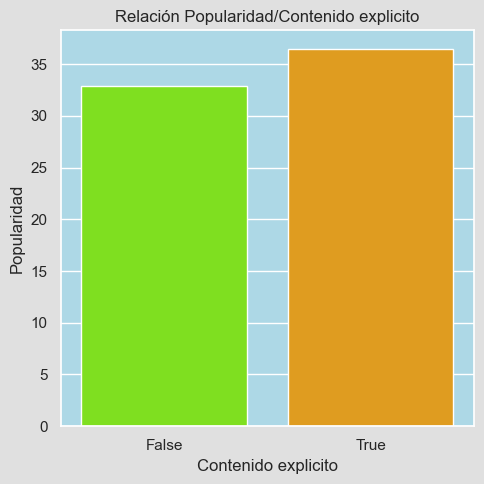

,explicit,popularity
0,True,36.454191
1,False,32.937891


In [8]:
# Relacionamos las canciones que tienen contenido explicito con la popularida que obtinene:
# (no olvidemos que las canciones con contenido explicto son de categoria boolean donde -> True= explicit//False=no explicit)

# Relacionamos con Pandas las caracteristicas:
explicit_popularity=spoty_data[['explicit','popularity']].groupby(['explicit'], as_index=False).mean().sort_values(by='popularity',ascending=False).reset_index(drop=True)

# Visualización gráfica:

# Estilo
sns.set(rc={"axes.facecolor":"#ADD8E6","figure.facecolor":"#E0E0E0"})
colors = ['#7FFF00', '#FFA500']

# Creación de gráfico
plt.figure(figsize=(5,5))
sns.barplot(x='explicit', y='popularity', palette=colors, data=explicit_popularity)

# Ajustar etiquetas y título
plt.xlabel('Contenido explicito')
plt.ylabel('Popularidad')
plt.title('Relación Popularidad/Contenido explicito')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Mostramos la agrupacion de carácterísticas establecidas anteriormente con pandas.
explicit_popularity

##### Teniendo en cuenta el gráfico las canciones con contenido explicito tienden a tener más popularidad que las que no tienen este tipo de contenidos, aunque la diferencia sea poco apreciable según estos datos.
Por lo que podemos entender que de cara a que un artista o grupo vayan a crear nuevas canciones, es conveniente que añadan canciones con contenido explicito a sus discos para que aumenten sus probabilidades de comercializarlo.

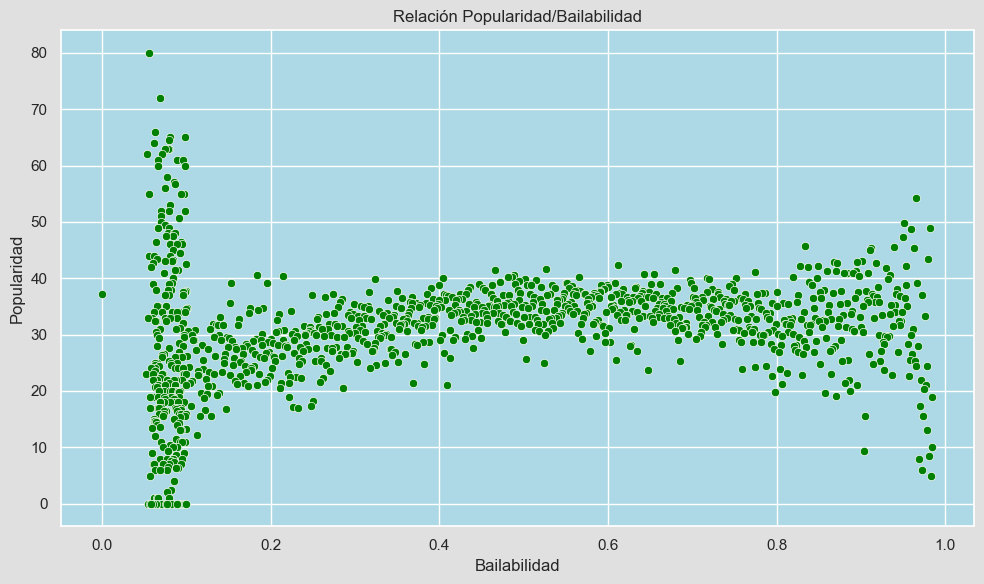

,danceability,popularity
0,0.0555,80.0
1,0.0685,72.0
2,0.0630,66.0
3,0.0808,65.0
4,0.0983,65.0
...,...,...
1169,0.0887,0.0
1170,0.0771,0.0
1171,0.0574,0.0
1172,0.0982,0.0


In [9]:
# Relacionamos las canciones que son bailables con la popularida que obtinenen:

danceability_popularity=spoty_data[['danceability','popularity']].groupby(['danceability'], as_index=False).mean().sort_values(by='popularity',ascending=False).reset_index(drop=True)

sns.set(rc={"axes.facecolor":"#ADD8E6","figure.facecolor":"#E0E0E0"})
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='popularity', color='green', data=danceability_popularity)
plt.xlabel('Bailabilidad')
plt.ylabel('Popularidad')
plt.title('Relación Popularidad/Bailabilidad')
plt.tight_layout()
plt.show()

# Pd:por la gran cantidad de datos reflejados en esta correlacion, el grafico ha sido cambiado de barras a gráfivo de dispersion
# (scatter plot)

danceability_popularity

##### Teniendo en cuenta el grafico de dispersion, podemos apreciar que la bailabilidad no es un factor influyen para la popularidad de una canción.
Sabiendo esto, podemos apreciar que la mayoria de canciones con una alta bailabilidad se mantienen con un factor de popularidad un poco por debajo de la media.

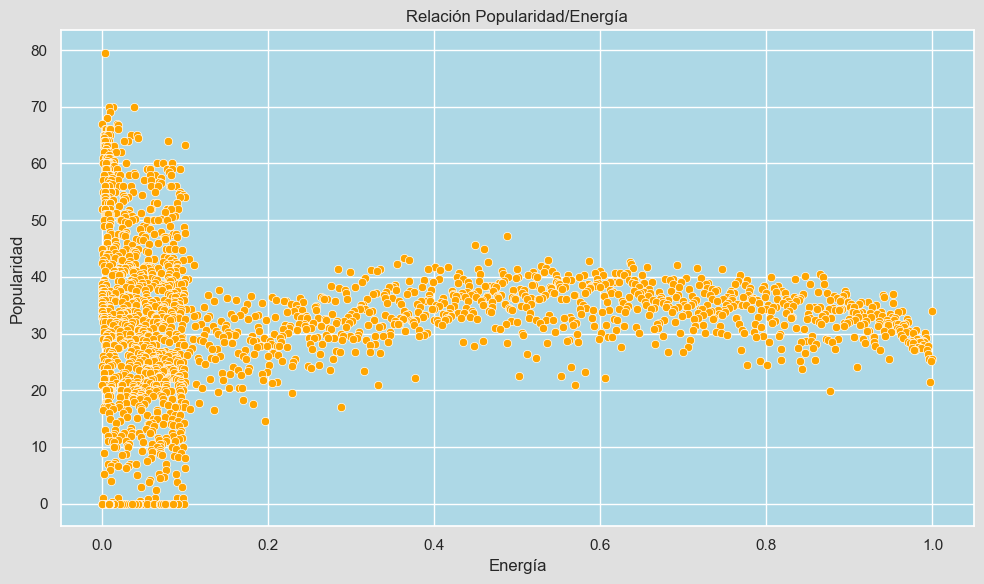

,energy,popularity
0,0.00342,79.5
1,0.01270,70.0
2,0.00769,70.0
3,0.03810,70.0
4,0.00935,69.0
...,...,...
2078,0.00815,0.0
2079,0.00798,0.0
2080,0.00791,0.0
2081,0.00778,0.0


In [10]:
# Relacionamos la variacion de la popularida con la energía que desprende la pista: (Recordamos que la energía se mide en 
# valores entre [0-1], considerando -> 0= poca energía / 1= muy energéticas)

energy_popularity=spoty_data[['energy','popularity']].groupby(['energy'], as_index=False).mean().sort_values(by='popularity',ascending=False).reset_index(drop=True)

sns.set(rc={"axes.facecolor":"#ADD8E6","figure.facecolor":"#E0E0E0"})
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='popularity', color='orange', data=energy_popularity)
plt.xlabel('Energía')
plt.ylabel('Popularidad')
plt.title('Relación Popularidad/Energía')
plt.tight_layout()
plt.show()

energy_popularity

##### Mirando la gráfica podemos apreciar que una baja energía en la música, acompaña a una popularidad mayor, mientras que una alta enrgía reduce el indice de popularidad.
Esto podemos interpretarlo como que a muchas de las canciones con baja energía pueden proceder de musica clásica y otros generos mucho más antiguos, que las de alta energía como el metal o el rap, que son más novedosos; esta antiguedad puede aportar un factor clave, como es el timepo que ha estado presente en las personas, considerando que este tipo de piezas han ido adquiriendo y consolidando una popularidad notoria a lo largo del tiempo

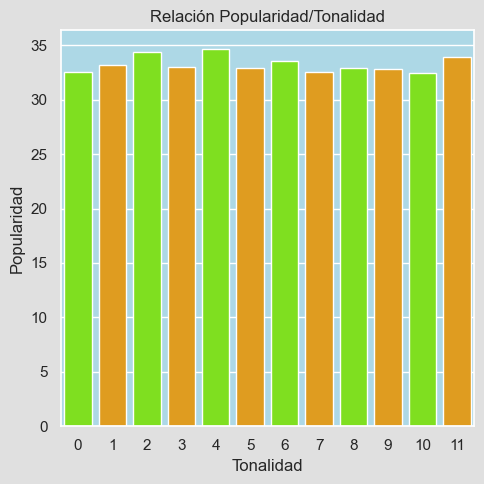

,key,popularity
0,4,34.643650
1,2,34.377619
2,11,33.887632
3,6,33.585532
4,1,33.200241
5,3,33.031653
6,8,32.958696
7,5,32.930935
8,9,32.823566
9,7,32.579615


In [11]:
# Relacionamos las canciones que tienen una cierta tonalidad (key) con la popularida que obtinenen:

key_popularity=spoty_data[['key','popularity']].groupby(['key'], as_index=False).mean().sort_values(by='popularity',ascending=False).reset_index(drop=True)

sns.set(rc={"axes.facecolor":"#ADD8E6","figure.facecolor":"#E0E0E0"})
colors = ['#7FFF00', '#FFA500']
plt.figure(figsize=(5,5))
sns.barplot(x='key', y='popularity', palette=colors, data=key_popularity)
plt.xlabel('Tonalidad')
plt.ylabel('Popularidad')
plt.title('Relación Popularidad/Tonalidad')
plt.tight_layout()
plt.show()

key_popularity

##### Observando la gráfica percibimos que la tonalidad no afecta de manera diferencial a la popularidad de las canciones.
Por lo que podemos entender que este es una aspecto algo más técnico de cara a la creacion musical.

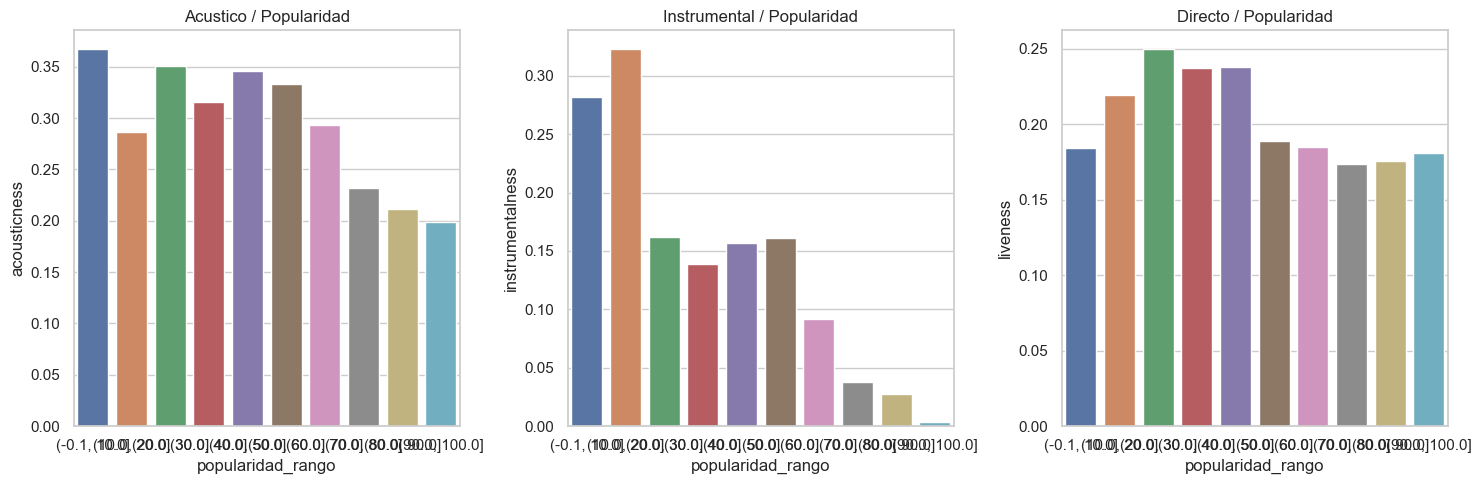

,acousticness,instrumentalness,liveness,popularity,popularidad_rango
0,0.01300,0.000005,0.2660,100.0,"(90.0, 100.0]"
1,0.01250,0.033000,0.2300,99.0,"(90.0, 100.0]"
2,0.58300,0.000002,0.2180,98.0,"(90.0, 100.0]"
3,0.09930,0.000291,0.1260,97.0,"(90.0, 100.0]"
4,0.09010,0.000027,0.0933,97.0,"(90.0, 100.0]"
...,...,...,...,...,...
82731,0.00757,0.001400,0.0226,0.0,"(-0.1, 10.0]"
82732,0.11200,0.000259,0.0697,0.0,"(-0.1, 10.0]"
82733,0.32700,0.044700,0.4930,0.0,"(-0.1, 10.0]"
82734,0.00756,0.000029,0.0939,0.0,"(-0.1, 10.0]"


In [12]:
# Vamos a relacionar las características de acusticos, instrumental y directo con la popularidad que obtienen estas canciones:

acou_inst_live_popularity=spoty_data[['acousticness','instrumentalness','liveness','popularity']].groupby(['acousticness','instrumentalness','liveness'], as_index=False).mean().sort_values(by='popularity',ascending=False).reset_index(drop=True)

# Agrupar la popularidad en rangos discretos
acou_inst_live_popularity['popularidad_rango'] = pd.cut(acou_inst_live_popularity['popularity'], bins=10)

# Calculamos el promedio de la popularidad para cada rango de popularidad
popularity_avg = acou_inst_live_popularity.groupby('popularidad_rango').mean().reset_index()

sns.set(style="whitegrid")

# Crear subplots para cada característica
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Creamos los gráficos de barras:
sns.barplot(x='popularidad_rango', y='acousticness', data=popularity_avg, ax=axes[0])
axes[0].set_title('Acustico / Popularidad')

sns.barplot(x='popularidad_rango', y='instrumentalness', data=popularity_avg, ax=axes[1])
axes[1].set_title('Instrumental / Popularidad')

sns.barplot(x='popularidad_rango', y='liveness', data=popularity_avg, ax=axes[2])
axes[2].set_title('Directo / Popularidad')

plt.tight_layout()
plt.show()

acou_inst_live_popularity
 
# y la otra de valencia y con eso concluir

##### Debido a que la diferencia entre estas tres carácteristicas principalmente es la naturaleza de la grabacion, he decidido correlacionarlas entre si segun la popularidad; para ello he establecido un rango de popularidad como muestra, y establecer donde se posicionan en ese rango, para interpretar como le afecta la popularidad a cada uno. He podido comprobar que las canciones que han sido grabadas en directo son las que tienen mayor indice de populariadad, generalmente hablando, seguida de las grabaciones en acustico y por ultimo las instrumentales de las mismas canciones o de canciones cuya naturaleza sea instrumental en sí.
Por lo que teniendo esto en cuenta, podemos definir que cuando un artista da un concierto y graba un tema relacionado con ello, ese tipo de canciones alcanzan un mayor indice de popularidad.

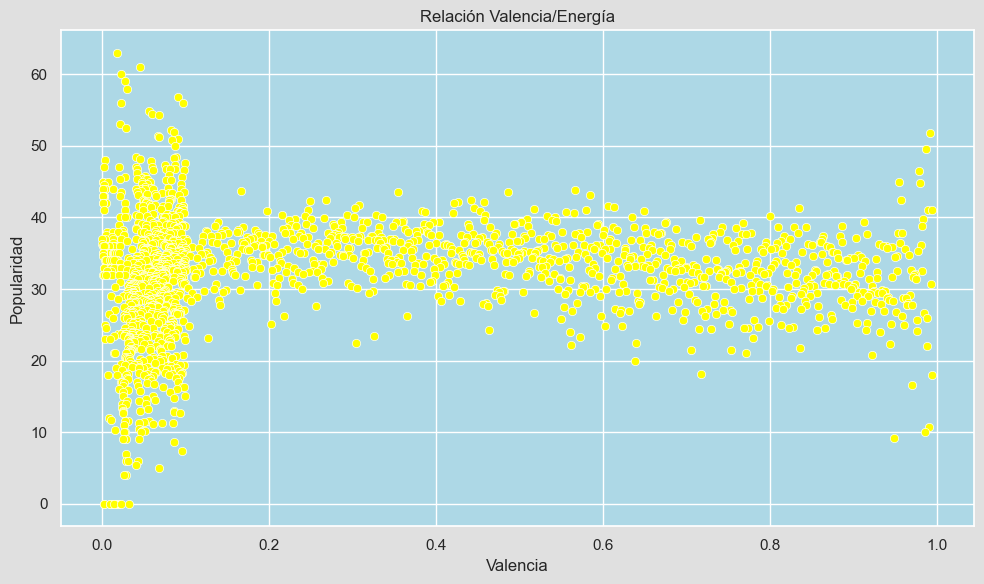

,valence,popularity
0,0.01740,63.0
1,0.04540,61.0
2,0.02270,60.0
3,0.02760,59.0
4,0.02910,58.0
...,...,...
1785,0.01460,0.0
1786,0.00876,0.0
1787,0.00973,0.0
1788,0.01420,0.0


In [13]:
# Relacionaremos la valencia que aportan las canciones con la popularidad que alcanzan:(Recordamos que la valencia hace referencia
# a los sentimiento de positividad que aporta la canción situandose como -> 0= sentimiento negativo / 1= sent. positivo )

valence_popularity=spoty_data[['valence','popularity']].groupby(['valence'], as_index=False).mean().sort_values(by='popularity',ascending=False).reset_index(drop=True)

sns.set(rc={"axes.facecolor":"#ADD8E6","figure.facecolor":"#E0E0E0"})
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence', y='popularity', color='yellow', data=valence_popularity)
plt.xlabel('Valencia')
plt.ylabel('Popularidad')
plt.title('Relación Valencia/Energía')
plt.tight_layout()
plt.show()

valence_popularity

##### Observando el gráfico, identificamos que hay muchas canciones que tienen una valencia más cercana al valor cero, por lo que podemos decir que las canciones que conectan con sentiminetos negativos alcanzan un mayor indice de popularidad.
Tambien puede entenderse de que las canciones conectan más con las personas cuando a estas le afectan emociones negativas (soledad, desamor...), que cuando estas experimentan emociones positivas (fiestas, logros...) 

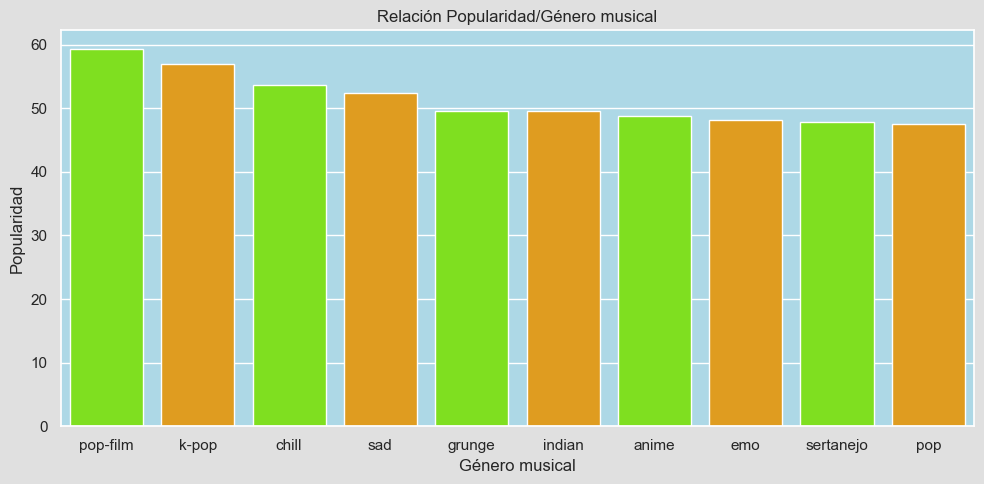

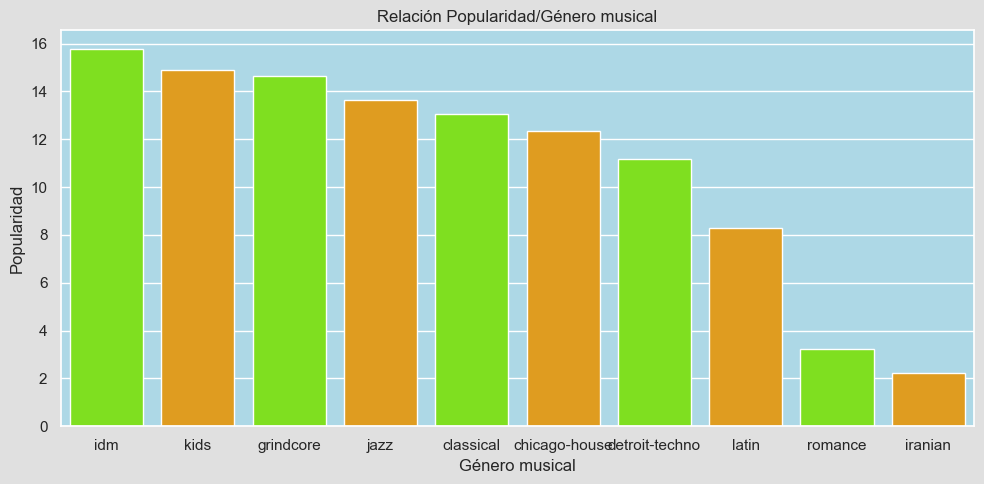

,track_genre,popularity
0,pop-film,59.283
1,k-pop,56.896
2,chill,53.651
3,sad,52.379
4,grunge,49.594
...,...,...
109,chicago-house,12.339
110,detroit-techno,11.174
111,latin,8.297
112,romance,3.245


In [14]:
# Para finalizar, relacionamos la popularidad según el genero musical:

genre_popularity=spoty_data[['track_genre','popularity']].groupby(['track_genre'], as_index=False).mean().sort_values(by='popularity',ascending=False).reset_index(drop=True)

genre_popularity_max=spoty_data[['track_genre','popularity']].groupby(['track_genre'], as_index=False).mean().sort_values(by='popularity',ascending=False).head(10).reset_index(drop=True)

sns.set(rc={"axes.facecolor":"#ADD8E6","figure.facecolor":"#E0E0E0"})
colors = ['#7FFF00', '#FFA500']
plt.figure(figsize=(10,5))
sns.barplot(x='track_genre', y='popularity', palette=colors, data=genre_popularity_max)
plt.xlabel('Género musical')
plt.ylabel('Popularidad')
plt.title('Relación Popularidad/Género musical')
plt.tight_layout()
plt.show()

genre_popularity_min=spoty_data[['track_genre','popularity']].groupby(['track_genre'], as_index=False).mean().sort_values(by='popularity',ascending=False).tail(10).reset_index(drop=True)

sns.set(rc={"axes.facecolor":"#ADD8E6","figure.facecolor":"#E0E0E0"})
colors = ['#7FFF00', '#FFA500']
plt.figure(figsize=(10,5))
sns.barplot(x='track_genre', y='popularity', palette=colors, data=genre_popularity_min)
plt.xlabel('Género musical')
plt.ylabel('Popularidad')
plt.title('Relación Popularidad/Género musical')
plt.tight_layout()
plt.show()

genre_popularity

##### Para finalizar con la correlación de datos, mostramos la popularidad según el género musical, donde podemos comprobar los diez primeros registros con la mayor popularidad, donde vemos el rey = Musica pop-peliculas, y su contra-partida, dentro de los diez ultimos registros, donde tenemos la cola = Musica Iraní.
No es determinante esta ultima columna pero si me parecia interesante según el estudio que realizamos.

#### Antes de iniciar el proceso de modelaje y prediccion, vamos a transformar las dentro de unidades de valor, con las que el machine learning trabaja mejor 
Para hacer efectivo a esto, voy a establecer unos rango para cada columna que es multinumérica y asignare un valor [1,2,3...] y tambien para la columna de género.

In [15]:
spoty_data_modelo=spoty_data # establecemos en otra variable nuestro datset transformado en rangos paras el modelaje.

# Vamos a establecer rangos dentro de nuestras columnas entre [0~3], para que el modelo trabaje sin problemas
# Empezamos con las columnas de numero decimales(danceability, energy, acousticness, instrumentalness, liveness, valence)
spoty_data_modelo.loc[
    (spoty_data_modelo['danceability'] <= 0.33) &
    (spoty_data_modelo['energy'] <= 0.33) &
    (spoty_data_modelo['acousticness'] <= 0.33) &
    (spoty_data_modelo['instrumentalness'] <= 0.33) &
    (spoty_data_modelo['liveness'] <= 0.33) &
    (spoty_data_modelo['valence'] <= 0.33),
    ['danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence']
] = 0

spoty_data_modelo.loc[
    (spoty_data_modelo['danceability'] > 0.33) & (spoty_data_modelo['danceability'] <= 0.66) &
    (spoty_data_modelo['energy'] > 0.33) & (spoty_data_modelo['energy'] <= 0.66) &
    (spoty_data_modelo['acousticness'] > 0.33) & (spoty_data_modelo['acousticness'] <= 0.66) &
    (spoty_data_modelo['instrumentalness'] > 0.33) & (spoty_data_modelo['instrumentalness'] <= 0.66) &
    (spoty_data_modelo['liveness'] > 0.33) & (spoty_data_modelo['liveness'] <= 0.66) &
    (spoty_data_modelo['valence'] > 0.33) & (spoty_data_modelo['valence'] <= 0.66),
    ['danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence']
] = 1

spoty_data_modelo.loc[
    (spoty_data_modelo['danceability'] > 0.66) &
    (spoty_data_modelo['energy'] > 0.66) &
    (spoty_data_modelo['acousticness'] > 0.66) &
    (spoty_data_modelo['instrumentalness'] > 0.66) &
    (spoty_data_modelo['liveness'] > 0.66) &
    (spoty_data_modelo['valence'] > 0.66),
    ['danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence']
] = 2

# Continuamos con popularidad y key:
spoty_data_modelo.loc[(spoty_data_modelo['popularity']<=60),['popularity']]=0
spoty_data_modelo.loc[(spoty_data_modelo['popularity']>60),['popularity']]=1

spoty_data_modelo.loc[(spoty_data_modelo['key']<=4),['key']]=0
spoty_data_modelo.loc[(spoty_data_modelo['key']>4) & (spoty_data_modelo['key']<=8),['key']]=1
spoty_data_modelo.loc[(spoty_data_modelo['key']>8),['key']]=2

# Cambiamos el boolean en explicit, que es practicamente pasar el false y true a valor numérico:
spoty_data_modelo.loc[(spoty_data_modelo['explicit']==False),['explicit']]=0
spoty_data_modelo.loc[(spoty_data_modelo['explicit']==True),['explicit']]=1

spoty_data_modelo[['danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence']] = spoty_data_modelo[['danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence']].astype(int)

spoty_data_modelo

,popularity,explicit,danceability,energy,key,acousticness,instrumentalness,liveness,valence,track_genre
0,1,0,0,0,0,0,0,0,0,acoustic
1,0,0,0,0,0,0,0,0,0,acoustic
2,0,0,0,0,0,0,0,0,0,acoustic
3,1,0,0,0,0,0,0,0,0,acoustic
4,1,0,0,0,0,0,0,0,0,acoustic
...,...,...,...,...,...,...,...,...,...,...
113995,0,0,0,0,1,0,0,0,0,world-music
113996,0,0,0,0,0,0,0,0,0,world-music
113997,0,0,0,0,0,0,0,0,0,world-music
113998,0,0,0,0,1,0,0,0,0,world-music


In [16]:
# En esta celda de código vamos a transformar los géneros de track_genre, para ello vamos a generar una columna
# para cada genero(114 generos), a valores numericos aptos apra el modelo,
# he decidido separarlo en otra celda porque es un poco más especial que lo anterior.

spoty_data_modelo_encoded = pd.get_dummies(spoty_data_modelo, columns=['track_genre'])

# Aunque solo sea una línea de codigo he utilizado la codificacion one-hot encoding que trae pandas (.get_dummies), 
# para transformar las variables categóricas, y así tratar con un gran nº de categorias en los datos.
# De este modo es apto para entrenar a mi modelo. De modo que nuestros datos para modelaje quedarian de la siguiente manera:

spoty_data_modelo_encoded

,popularity,explicit,danceability,energy,key,acousticness,instrumentalness,liveness,valence,track_genre_acoustic,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
113996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
113997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
113998,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Con esto acabamos la primera estapa de analisis de datos, vamos a hacer un recueto sobre todo de los últimos cambios
Hemos agrupado los datos con pandas para establecer relaciones con nuestra variable objetivo 'Popularity' y las hemos representado gráficamente.

Hemos transformado nuestro dataset a valores númericos aptos para el modelaje, y ha quedado tal que asi:

   - las columnas: **[danceability, energy, acousticness, instrumentalness, liveness, valence]**, se han establecido con valores -> 
                    0 = rango comprendido entre [0 ~ 0.33]
                    1 = rango comprendido entre [0.33 ~ 0.66]
                    2 = rango comprendido entre [0.66 ~ 1]
                    
   - la columna: **[popularity]**, se ha establecido con valores ->
                    0 = rango comprendido entre [0 ~ 60] (poco populares = - éxito)
                    1 = rango comprendido entre [60 ~ 100] (muy populares = + éxito)
                    
                    
   - la columna: **[key]**, se ha establecido con valores ->
                    0 = rango comprendido entre [0 ~ 4]
                    1 = rango comprendido entre [4 ~ 8]
                    2 = rango comprendido entre [8 ~ 11]
                                  
   - la columna: **[explicit]**, se ha establecido con valores ->
                    0 = para canciones con contenido no explicto [False]
                    1 = para canciones con contenido explicto [True]
                    
   - Cada columna de **[genero (track_genre)]**, gracias a la tecnica de one-hot encoding, se distribuyen en columnas de valores ->
                    0 = para canciones que no se incluyen dentro ese genero
                    1 = para canciones que se incluyen dentro de ese genero
                    
Por lo que podemos concluir con esta primera etapa y comenzar el proceso de modelado y prediccion, ya que nuetsros datos estan listos

### Creación de datos (train/test) para el modelo, Aplicación de modelos y Predicción

In [17]:
# Aunque ya hemos visto antes la distribución, queria tener buenas prácticas y mostrar los datos con los que ibamos a trbajar.

#Voy a añadir nuestra info a una variable con nombre más corto:
spoty_model=spoty_data_modelo_encoded

# En el primer paso, con el método [.Keys()], comprobamos la información de nuestro bunch.
spoty_model.keys()

Index(['popularity', 'explicit', 'danceability', 'energy', 'key',
       'acousticness', 'instrumentalness', 'liveness', 'valence',
       'track_genre_acoustic',
       ...
       'track_genre_spanish', 'track_genre_study', 'track_genre_swedish',
       'track_genre_synth-pop', 'track_genre_tango', 'track_genre_techno',
       'track_genre_trance', 'track_genre_trip-hop', 'track_genre_turkish',
       'track_genre_world-music'],
      dtype='object', length=123)

In [18]:
# Dividimos nuestros datos para poder estblecer la prediccion del modelo:

# En Y_train/test, guardamos unicamente la columna de popularidad que es nuestro valor objetivo que queremos predecir
Y_train=spoty_model["popularity"]
Y_test=spoty_model["popularity"]

# En X_train/test, extraemos la columna de popularidad y dejamos todas las caracteristicas vistas anteiormente para la prediccion
X_train=spoty_model.drop(["popularity"], axis=1)
X_test=spoty_model.drop(["popularity"], axis=1)

# Mostramos nuestro conjunto de datos:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((114000, 122), (114000,), (114000, 122), (114000,))

#### Ya tenemos nuestros datos divididos y listos para aplicar al modelo.
Para nuestras predicciones he decidido elegir estos modelos:

   - Logistic Regression
   - Random Forest classf.
   - KNN: K-Nearest Neighbors classf.
   - Gaussian Naive Bayes
   - Linear Support Vector Machine (LSVC)
    
Con ellos vamos a establecer cual tiene mejor rango de predicción y los compararemos entre sí con el accuracy de la variable f-1 score, que la obtendremos de el classification report.

**Logistic Regression:** Es un modelo lineal simple que se utiliza comúnmente en problemas de clasificación binaria. Aunque es simple, puede ser efectivo para clasificar muestras en dos clases diferentes. Desde el punto de vista de clasificar las canciones dependiendo de si obtendrán popularidad o no, puede aportar datos interesantes.

In [19]:
# Vamos a empezar con el modelo: Regresion logistica

# Acotamos con una variable la llamada al modelo (instanciar)
log_reg=LogisticRegression(max_iter=200)

# Entrenamos nuestro modelo
log_reg.fit(X_train,Y_train)

# Hacemos la prediccion e imprimos por pantalla
logreg_prediccion=log_reg.predict(X_test)

# Mostramos la matriz de confusión y el clasification report
print("\nMatriz de confusión:\n")
confusion_matrix_logreg=confusion_matrix(Y_test, logreg_prediccion)
print(confusion_matrix_logreg)

print("\nReporte de clasificacion - Modelo Logistic Regression:\n")
reporte=classification_report(Y_test, logreg_prediccion)
print(reporte)

# Mostramos y guardamos el valor de F1-socre, para hacer una comparativa posterior
f1=f1_score(Y_test, logreg_prediccion, average='micro') # utilizo average micro, porq debido al desbalanceo de la clase, este se acerca más al del classification report.
print("\nF1-score promedio obtenido de la Regresión logística:\n")
print(f1)

data_f1_logreg=round(f1*100, 2)
print("\nResultado guardado para comparar:",data_f1_logreg)


Matriz de confusión:

[[99931   499]
 [12724   846]]

Reporte de clasificacion - Modelo Logistic Regression:

              precision    recall  f1-score   support

           0       0.89      1.00      0.94    100430
           1       0.63      0.06      0.11     13570

    accuracy                           0.88    114000
   macro avg       0.76      0.53      0.53    114000
weighted avg       0.86      0.88      0.84    114000


F1-score promedio obtenido de la Regresión logística:

0.8840087719298245

Resultado guardado para comparar: 88.4


**Random Forest:** Es un algoritmo de aprendizaje conjunto que crea múltiples árboles de decisión y combina sus predicciones para obtener una predicción más robusta y generalizable. Gracias a que tienen grnades capacidades para manejar grandes conjuntos de datos, es una eleccion interesante para tener en cuenta todos los datos de nuestro dataset

In [20]:
# Modelo: Random Forest

random_forest=RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train,Y_train)

random_forest_prediccion=random_forest.predict(X_test)

print("\nMatriz de confusión:\n")
confusion_matrix_rndfo=confusion_matrix(Y_test, random_forest_prediccion)
print(confusion_matrix_rndfo)

print("\nReporte de clasificacion - Modelo Random Forest:\n")
reporte=classification_report(Y_test, random_forest_prediccion)
print(reporte)


f1=f1_score(Y_test, random_forest_prediccion, average='micro')
print("\nF1-score promedio obtenido de Random Forest:\n")
print(f1)

data_f1_rndfo=round(f1*100, 2)
print("\nResultado guardado para comparar:",data_f1_rndfo)


Matriz de confusión:

[[99548   882]
 [12231  1339]]

Reporte de clasificacion - Modelo Random Forest:

              precision    recall  f1-score   support

           0       0.89      0.99      0.94    100430
           1       0.60      0.10      0.17     13570

    accuracy                           0.88    114000
   macro avg       0.75      0.54      0.55    114000
weighted avg       0.86      0.88      0.85    114000


F1-score promedio obtenido de Random Forest:

0.8849736842105264

Resultado guardado para comparar: 88.5


**K-Nearest Neighbors:** Algoritmo de aprendizaje supervisado que clasifica muestras basándose en la similitud con las muestras de entrenamiento más cercanas en el espacio de características. De cara a relacionar canciones que ya han tenido popularidad con las carácteristicas que tengan las canciones que intentan ser predecidas, puede ser interesante para conocer si serán populares.

In [21]:
# Modelo: K-Nearest Neighbors (KNN)

knn=KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,Y_train)

knn_prediccion=knn.predict(X_test)

print("\nMatriz de confusión:\n")
confusion_matrix_knn=confusion_matrix(Y_test, knn_prediccion)
print(confusion_matrix_knn)

print("\nReporte de clasificacion - Modelo K-Nearest Neighbors:\n")
reporte=classification_report(Y_test, knn_prediccion)
print(reporte)


f1=f1_score(Y_test, knn_prediccion, average='micro')
print("\nF1-score promedio obtenido de K-Nearest Neighbors:\n")
print(f1)

data_f1_knn=round(f1*100, 2)
print("\nResultado guardado para comparar:",data_f1_knn)


Matriz de confusión:

[[69496 30934]
 [ 5053  8517]]

Reporte de clasificacion - Modelo K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.93      0.69      0.79    100430
           1       0.22      0.63      0.32     13570

    accuracy                           0.68    114000
   macro avg       0.57      0.66      0.56    114000
weighted avg       0.85      0.68      0.74    114000


F1-score promedio obtenido de K-Nearest Neighbors:

0.6843245614035087

Resultado guardado para comparar: 68.43


**Gaussian Naives Bayes:** Es un algoritmo de aprendizaje supervisado basado en el teorema de Bayes; es simple y rápido, aunque quizas para la gran cantidad de características del dataset no sea quien ofrezca mejor rendimiento.

In [22]:
# Modelo: Clasificador bayesiano

gaussian=GaussianNB()

gaussian.fit(X_train,Y_train)

gaussian_prediccion=gaussian.predict(X_test)

print("\nMatriz de confusión:\n")
confusion_matrix_gaussian=confusion_matrix(Y_test, gaussian_prediccion)
print(confusion_matrix_gaussian)

print("\nReporte de clasificacion - Modelo Clasificador Bayesiano:\n")
reporte=classification_report(Y_test, gaussian_prediccion)
print(reporte)


f1=f1_score(Y_test, gaussian_prediccion, average='micro')
print("\nF1-score promedio obtenido del Clasificador Bayesiano:\n")
print(f1)

data_f1_gaussian=round(f1*100, 2)
print("\nResultado guardado para comparar:",data_f1_gaussian)


Matriz de confusión:

[[46644 53786]
 [  388 13182]]

Reporte de clasificacion - Modelo Clasificador Bayesiano:

              precision    recall  f1-score   support

           0       0.99      0.46      0.63    100430
           1       0.20      0.97      0.33     13570

    accuracy                           0.52    114000
   macro avg       0.59      0.72      0.48    114000
weighted avg       0.90      0.52      0.60    114000


F1-score promedio obtenido del Clasificador Bayesiano:

0.5247894736842105

Resultado guardado para comparar: 52.48


**Linear Support Vector  Machine:** Es un modelo de aprendizaje supervisado que encuentra el hiperplano óptimo que separa las muestras en diferentes clases en un espacio de características, por lo que puede aportan un resultado interesante en el trabajo de nuestro dataset, ya que tiene relacionadas muchas características para determinar su popularidad.

In [23]:
# Modelo: Linear Support Vector Machine (LSVC)

lsvc=LinearSVC(max_iter=10000)

lsvc.fit(X_train,Y_train)

lsvc_prediccion=lsvc.predict(X_test)

print("\nMatriz de confusión:\n")
confusion_matrix_lsvc=confusion_matrix(Y_test, lsvc_prediccion)
print(confusion_matrix_lsvc)

print("\nReporte de clasificacion - Modelo Linear Support Vector Machine:\n")
reporte=classification_report(Y_test, lsvc_prediccion)
print(reporte)


f1=f1_score(Y_test, lsvc_prediccion, average='micro')
print("\nF1-score promedio obtenido de Linear SVC:\n")
print(f1)

data_f1_lsvc=round(f1*100, 2)
print("\nResultado guardado para comparar:",data_f1_lsvc)


Matriz de confusión:

[[99985   445]
 [12823   747]]

Reporte de clasificacion - Modelo Linear Support Vector Machine:

              precision    recall  f1-score   support

           0       0.89      1.00      0.94    100430
           1       0.63      0.06      0.10     13570

    accuracy                           0.88    114000
   macro avg       0.76      0.53      0.52    114000
weighted avg       0.86      0.88      0.84    114000


F1-score promedio obtenido de Linear SVC:

0.8836140350877193

Resultado guardado para comparar: 88.36


#### Ya tenemos nuestros modelos con sus predicciones, por lo que hemos llegado prácticamente al final de nuestra segunda etapa de modelaje.
Ahora para encaminar el proyecto hacia sus conclusiones vamos a crear un dataframe, con los resultados obtenidos de f1-score, para ver el rendimiento de estos modelos y hacer una comparativa.

In [24]:
# Creamos el nuevo dataframe con los resultados de nuestros modelos, y lo ordenamos segun su resultado más alto
comparacion_modelos=pd.DataFrame({
    "Modelo":["Logistic Regression", "Random Forest","K-Nearest Neighbors(KNN)","Gaussian Naive Bayes","Linear Support Vector Machine(LSVC)"],
    "Resultado (sobre 100)":[data_f1_logreg, data_f1_rndfo, data_f1_knn, data_f1_gaussian, data_f1_lsvc]
})

comparacion_modelos=comparacion_modelos.sort_values(by="Resultado (sobre 100)", ascending=False)

# Reseteamos el indice para detallarlo más claramente
comparacion_modelos.reset_index(drop=True, inplace=True)

# Mostramos El Dframe.
comparacion_modelos

,Modelo,Resultado (sobre 100)
0,Random Forest,88.50
1,Logistic Regression,88.40
2,Linear Support Vector Machine(LSVC),88.36
3,K-Nearest Neighbors(KNN),68.43
4,Gaussian Naive Bayes,52.48


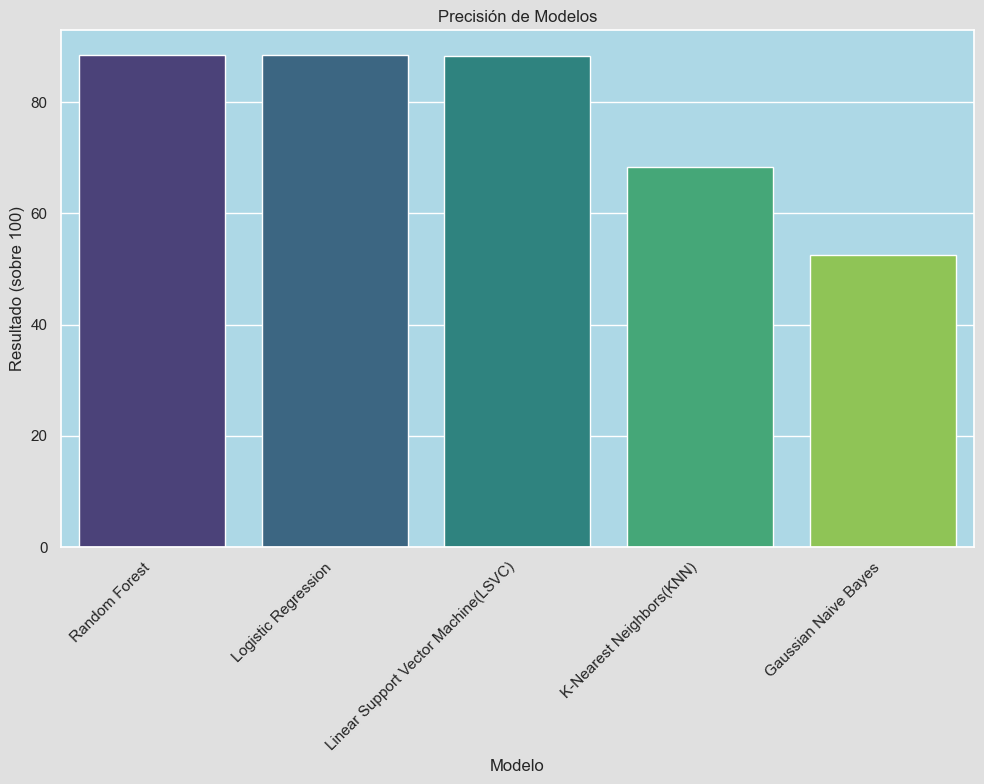

In [25]:
# Representamso gráficamente Los resultados
plt.figure(figsize=(10,8))
sns.barplot(data=comparacion_modelos, x='Modelo', y='Resultado (sobre 100)', palette='viridis')
plt.xlabel('Modelo')
plt.ylabel('Resultado (sobre 100)')
plt.title('Precisión de Modelos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Conclusiones

El objetivo principal del proyecto consiste en evaluar e intentar predecir la popularidad dentro del conjunto de canciones que tenemos. Entendiendo la popularidad como el éxito que posiblemente tendrá una canción.

Para ello, y después de hacer un filtrado de la información, hemos utilizado diferentes modelos para relacionar si son capazces de establecer que popularidad tendrá una canción teniendo en cuenta las características trabajadas.


Según podemos ver, en el gráfico superior, dentro de los 5 modelos con los que hemos trabajado ha habido tres que han sobresalido notoriamente alcanzando un resultado de hasta un **88% de acierto**. Entendemos que estos modelos son capaces de tener una gran tasa de acierto a la hora de predecir si una canción tendrá o no exito.

Los modelos destacados han sido:

- **Random Forest, con un 88,5% de acierto**, entendemos que este modelo ha sido el que mejor resultado ha mostrado para         la predicción debido a la gran cantidad de datos y las realciones complejas entre las características que presenta el conjunto de datos con el que hemos trabajado.


- **Logistic Regression, con un 88,4% de acierto**, muy cercano en cuanto a resultado al modelo anterior, no ha superado el resultado del modelo anterior debido a que funciona muy bien en condiciones binarias, y en este caso se ha encontrado con varias carácterísticas a tener en cuenta para poder establecer la predicción, aún así, ha sido el segundo mejor resultado de nuestro proyecto.


- **Linear Support Vector Machine, con un 88.36% de acierto**, el resultado de la predicción de este modelo me ha sorprendido debido a que ha sido más alto de lo que esperaba, ya que debe de relacionar las carácterísticas entre sí diferenciandolas, pero tras el resultado obtenido podemos definir que la relación entre las características y la variable objetivo (popularidad) se establecen, en mayor medida, de modo lineal.

Por otro lado, tenemos dos modelos que no han obtenido un buen rendimiento en la predicción como los anteriores, con lo que concluimos:

- **K-Nearest Neighbours, con un 68,43% de acierto**, tiene una tasa de acierto más moderada que los modelos anteriores, esto puede deberse a que la popularidad en una cancion no se debe directamente a su relacion con canciones del mismo genero, si no a el conjunto propio de características de una canción.


- **Gaussian Naive Bayes, con un 52,48% de acierto**, es el modelo con un rendimiento más mediocre, posiblemente el resultado debe relacionarse con que este modelo establece que las características son independientes entre sí, y como hemos visto en los modelos anteriores que relacionan las carácteristicas, no es tan válido para este conjunto de datos establecer ese criterio.

Teniendo en cuenta todo el código desarrollado, podemos interpretar ciertas mejoras en el procesamiento de datos, con el fin de mejorar el rendimiento de los modelos. Estas mejoras podrían ser:

- Simplificar más aun los datos con los que opera el modelo, por ejemplo eliminar la columna Key (tonalidad), que puede interpretarse también como un concepto más técnico.

- Establecer una nueva columna que relacione dos o más columnas de datos entre sí, para acotar los datos con los que el modelo trabaja y así poder ser más eficaz en la predicción.

- Elegir otros modelos que operen con gran cantidad de características para poder mejorar el resultado.

Para finalizar, considero que el procesamiento de datos previo al modelaje y predicción ha permitido adquirir un alto rango de aciertos en el conjunto de datos; siendo mi primer proyecto de machine learning esperaba conseguir una tasa de acierto menor, por lo que estoy satisfecho con los resultados.

### Exportación

In [26]:
# Vamos a proceder a realizar una comparativa de resultados entre la prediccion y el predicho y luego exportaremos a excel.

# creamos un df, con la prediccion del modelo que más aciertos ha tenido y el valor real
resultados=pd.DataFrame({
    "track":range(len(spoty_data)),
    "Resultado predicho":random_forest_prediccion,
    "Resultado real":Y_test
})

# Calculamos la diferencia, donde False( = no ha acertado el modelo y True= si ha acertado
resultados["Diferencia"] = resultados["Resultado predicho"].eq(resultados["Resultado real"])

# lo pasamos a csv
resultados.to_csv('Diferencia resultados.csv', index=False, sep=',', encoding='utf-8')

# Mostramos el df
resultados

,track,Resultado predicho,Resultado real,Diferencia
0,0,0,1,False
1,1,0,0,True
2,2,0,0,True
3,3,0,1,False
4,4,0,1,False
...,...,...,...,...
113995,113995,0,0,True
113996,113996,0,0,True
113997,113997,0,0,True
113998,113998,0,0,True
